In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from src.data.key_dataset import remove_overlaps, select_keys, create_windows, KeyDataset
from src.data.filter import Filter

from src.data.utils import bipolar_conversion, load_data, key_counts, load_data_deprecated
from src.visualization.visualize import layout
from src.utils import load_config
from src.models.keydecoder import KeyDecoder
from src.models.train import train
from src.models.utils import Experiment

import importlib
import operator
from functools import reduce

/home/john/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/john/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.12.1-git20200711.33e2d80-dfsg1-0.6 is an invalid version and will not be supported in a future release
  warnings.warn(


In [41]:
filter_params = {}
fn = filter_params.get('fn', [60, 120, 180, 60, 300, 240])
qs = filter_params.get('qs', [10, 5, 2, 4, 2, 2])
fc = filter_params.get('fc', (10, 1000))
fs = filter_params.get('fs', 4000)
filt = Filter(fn, qs, fc=fc, butterworth_type='bandpass', order=4, sampling_freq=fs)

In [84]:
data_dir = "/home/john/rumi/data/"

#expt_names = ["Shreyas-Kaasyap_2023-08-04-1255_Open-Loop-Typing-Task",
#              "Shreyas-Kaasyap_2023-07-31-1407_Open-Loop-Typing-Task",
#              "Shreyas-Kaasyap_2023-08-01-1528_Open-Loop-Typing-Task"]

#expt_names = ["Nima-Hadidi_2023-09-26-1649_Gesture-Decoding-Task"]
# expt_names = ["NIma_2023-08-31-1833_Gesture-Decoding-Task"]
#expt_names = ["Nima_2023-08-25-2008_Gesture-Decoding-Task"]
#expt_names = ["Shreyas-Kaasyap_2023-08-24-1437_Open-Loop-Typing-Task"]
#expt_names = ["Shreyas_2023-08-24-1709_Open-Loop-Typing-Task"]
#expt_names = ["Shreyas_2023-08-28-1546_Open-Loop-Typing-Task"]

#expt_names = ["Shreyas_2023-08-29-1604_Open-Loop-Typing-Task"]
#expt_names = ["Jaco_2023-10-24-1911_Open-Loop-Typing-Task"]
expt_name = "Jacob_2023-10-30-1748_Closed-Loop-Typing-Task"

emg_fname = data_dir + expt_name + "/data_streams/emg_stream.bin"

emg_data = load_data(emg_fname)
emg_names = ['emgbuffer'] + list(emg_data.dtype.names)[1:]
emg_data.dtype.names = emg_names
        
        #print(key_data[key_data['keybuffer'][:, 0] != 0])

emg_stream = emg_data['emgbuffer'][:, 1:33]
bp_emg_stream = bipolar_conversion(emg_stream, offset=2, grid_type=["8-8-L-1"])
filtered_emg_stream = filt.filter_data(bp_emg_stream)

In [85]:
print(filtered_emg_stream.shape)

(445845, 16)


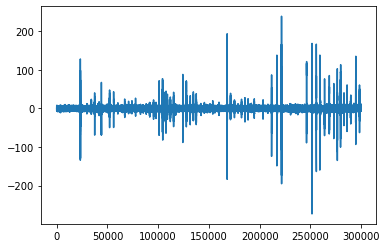

In [88]:
y = filtered_emg_stream[:300000, 0]
x = np.arange(0, y.shape[0])
plt.plot(x, y)

In [87]:
(445845/4000)/60

1.8576875000000002